# Perceptron

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)      # iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3,1]]
y_pred = per_clf.predict(X_new)

In [3]:
y_pred

array([ True, False])

# Regression MLP

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data,
    housing.target,
    random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full,
    y_train_full,
    random_state=42
)

# MLP
mlp_reg = MLPRegressor(
    hidden_layer_sizes=[50, 50, 50],
    random_state=42
)

pipeline = make_pipeline(
    StandardScaler(),
    mlp_reg
)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)


In [5]:
rmse

0.5053326657968684

# MLP with keras
## Image classifier with sequential API

In [6]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

2025-10-13 06:58:23.118172: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


In [8]:
X_train.shape

(55000, 28, 28)

In [9]:
X_train.dtype

dtype('uint8')

In [10]:
# scaling pixel intensities down to 0-1 range
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.


In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

In [12]:
# creating model using sequential API with 2 hidden layers
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/mnt/Programming/ML/intro_ann/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1760335173.640583     440 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2057 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# model's list of layers
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [15]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [16]:
# parameters of the layer
weights, biases = hidden1.get_weights()
weights

array([[-0.04738352,  0.01215788,  0.01857084, ...,  0.01639723,
        -0.03977657, -0.05424605],
       [-0.05935207,  0.03790224, -0.01986453, ...,  0.00017988,
        -0.0325156 ,  0.0303762 ],
       [ 0.05440567,  0.07198504, -0.02112382, ...,  0.05126548,
        -0.02910209,  0.04880445],
       ...,
       [ 0.0169258 ,  0.04931418, -0.0407333 , ...,  0.04032827,
        -0.04140331, -0.0117799 ],
       [ 0.05874512,  0.00590488,  0.02802987, ..., -0.01685861,
         0.02903955,  0.0088831 ],
       [-0.02937245,  0.01917788, -0.07417437, ...,  0.04642963,
        -0.06562133,  0.0611085 ]], shape=(784, 300), dtype=float32)

In [17]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
biases.shape

(300,)

### compiling

In [19]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "sgd",
    metrics = ["accuracy"]
)

### training and evaluating the model

In [20]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

2025-10-13 06:59:44.266210: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 172480000 exceeds 10% of free system memory.
2025-10-13 06:59:44.490426: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/30


2025-10-13 06:59:47.202228: I external/local_xla/xla/service/service.cc:163] XLA service 0x7fbe6c003890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-13 06:59:47.202264: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-10-13 06:59:48.602397: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-13 06:59:50.633228: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91301


  72/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3145 - loss: 2.0406 

I0000 00:00:1760335194.989313     551 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.7643 - loss: 0.7221 - val_accuracy: 0.8248 - val_loss: 0.5124
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8303 - loss: 0.4906 - val_accuracy: 0.8352 - val_loss: 0.4600
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8449 - loss: 0.4456 - val_accuracy: 0.8424 - val_loss: 0.4359
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8544 - loss: 0.4185 - val_accuracy: 0.8484 - val_loss: 0.4190
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8613 - loss: 0.3986 - val_accuracy: 0.8500 - val_loss: 0.4088
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8670 - loss: 0.3826 - val_accuracy: 0.8534 - val_loss: 0.3997
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8707 - loss: 0.3690 - val_accuracy: 0.8570 - val_loss: 0.3918
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8745 - loss: 0.3571 - val_accura

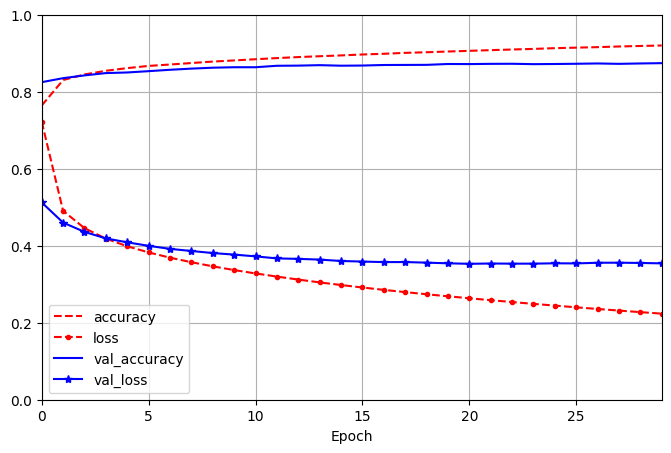

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.","b-", "b-*"]
)
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8716 - loss: 0.3687


[0.3687380254268646, 0.8715999722480774]

### predictions

In [23]:
X_new = X_test[:3]      # using first 3 from test set
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.28, 0.  , 0.01, 0.  , 0.71],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [24]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


In [25]:
# checking if the predictions are correct or not
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

they are correct indeed

## Regression MLP using Sequential API

In [26]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape = X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1),
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

/mnt/Programming/ML/intro_ann/venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


2025-10-13 07:01:59.186470: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 172480000 exceeds 10% of free system memory.
2025-10-13 07:01:59.334695: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - RootMeanSquaredError: 2.9356 - loss: 8.6178 - val_RootMeanSquaredError: 2.9025 - val_loss: 8.4246
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - RootMeanSquaredError: 2.8821 - loss: 8.3067 - val_RootMeanSquaredError: 2.8983 - val_loss: 8.4004
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 2.8783 - loss: 8.2846 - val_RootMeanSquaredError: 2.8997 - val_loss: 8.4083
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - RootMeanSquaredError: 2.8768 - loss: 8.2762 - val_RootMeanSquaredError: 2.8998 - val_loss: 8.4086
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 2.8759 - loss: 8.2708 - val_RootMeanSquaredError: 2.8984 - val_loss: 8.4005
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 2.8750 - loss: 8.2655 - val_RootMeanSquaredError: 2.8959 - val_loss: 8.3860
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - RootMeanSquaredError: 2.8742 - 

In [27]:
y_pred

array([[[4.4540873],
        [4.4540873],
        [4.4540873],
        [4.4540873],
        [4.4540873],
        [4.4540873],
        [4.4540873],
        [4.4577174],
        [4.4460983],
        [4.481681 ],
        [4.485244 ],
        [4.483877 ],
        [4.4834423],
        [4.485447 ],
        [4.4798536],
        [4.4705124],
        [4.4710684],
        [4.4783335],
        [4.483036 ],
        [4.4752803],
        [4.475459 ],
        [4.4649906],
        [4.4540873],
        [4.4540873],
        [4.4540873],
        [4.4540873],
        [4.4540873],
        [4.4540873]],

       [[4.429427 ],
        [4.3581934],
        [4.3687983],
        [4.375739 ],
        [4.3721266],
        [4.409236 ],
        [4.329357 ],
        [4.402072 ],
        [4.4104786],
        [4.4803076],
        [4.3777485],
        [4.381956 ],
        [4.3768225],
        [4.378573 ],
        [4.3790083],
        [4.377366 ],
        [4.3759546],
        [4.3745575],
        [4.373663 ],
        [4.

# Subclassing API to build dynamic models

In [28]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

tf.random.set_seed(42)
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")